In [2]:
# Download the dataset
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.49MB/s]
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.47MB/s]


In [3]:
!mv california-housing-prices.zip data/
!unzip data/california-housing-prices.zip -d data/

Archive:  data/california-housing-prices.zip
  inflating: data/housing.csv        


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


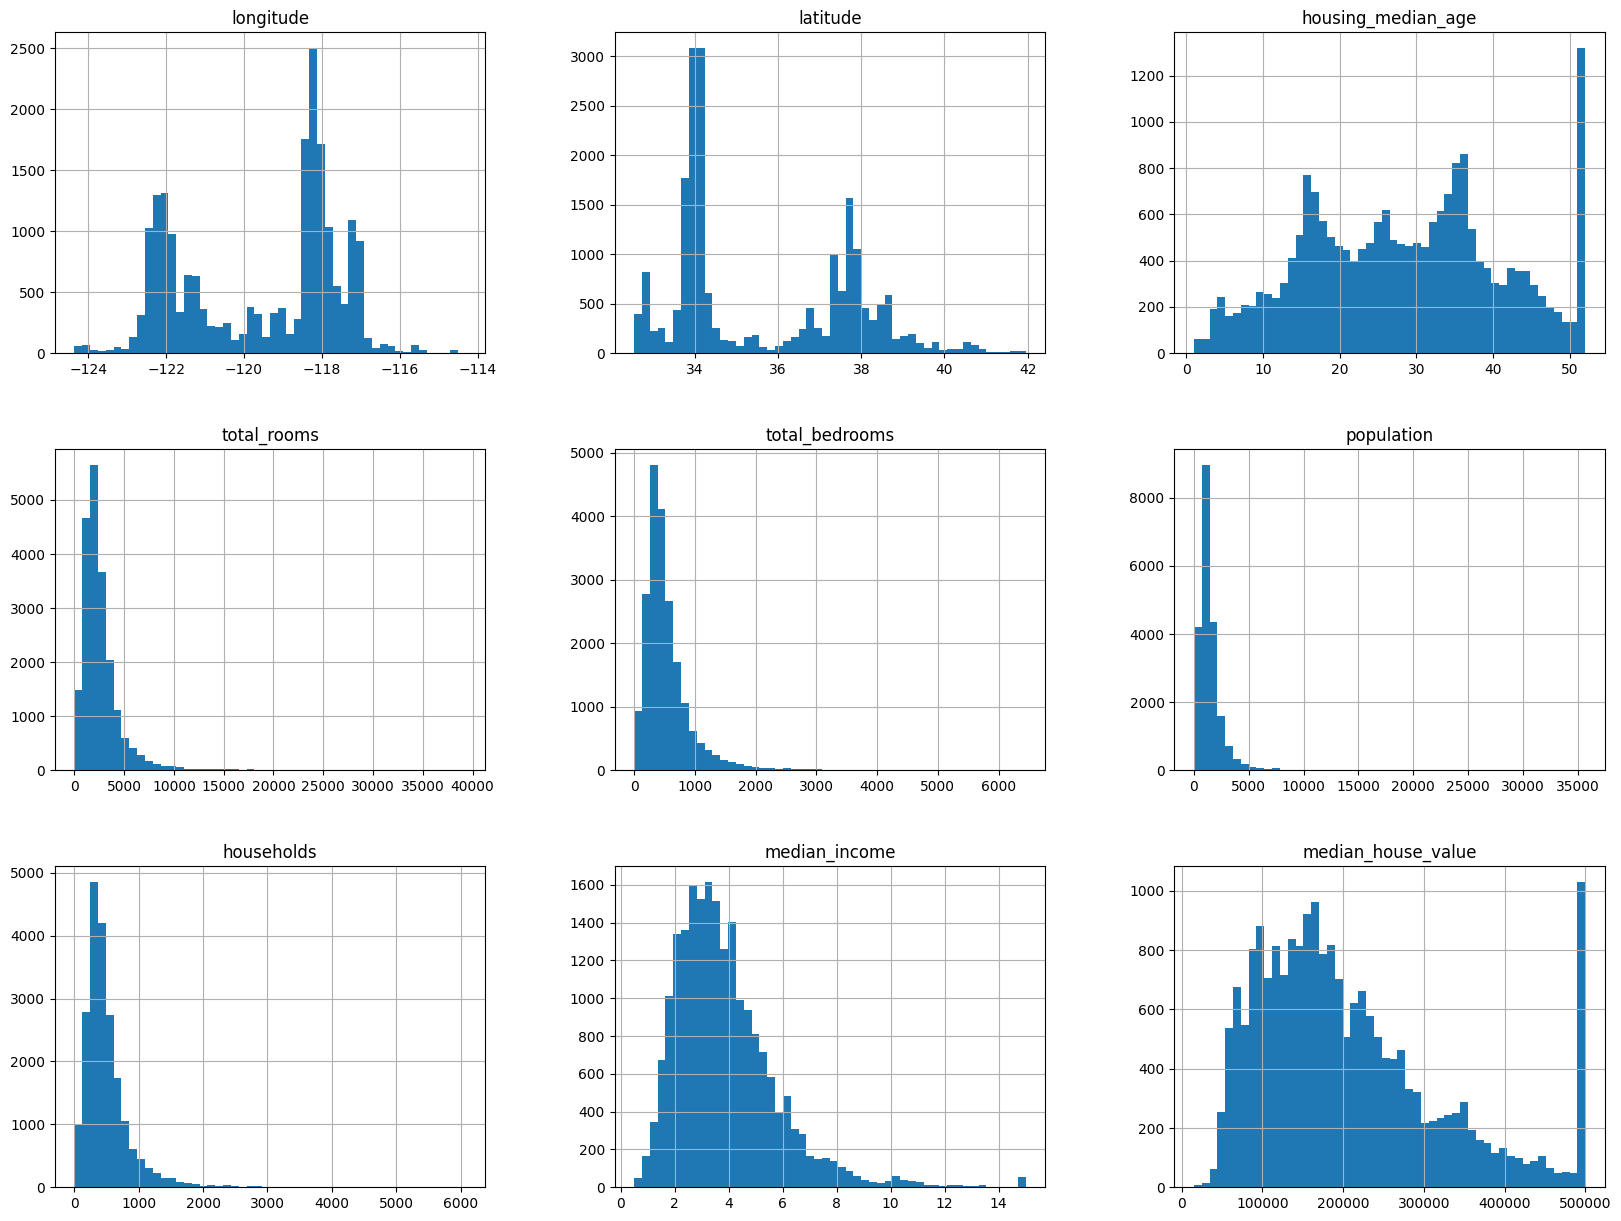

In [3]:
# EDAs
housing.info()
housing.describe()
housing['ocean_proximity'].value_counts()
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# how to show ocean_proximity values


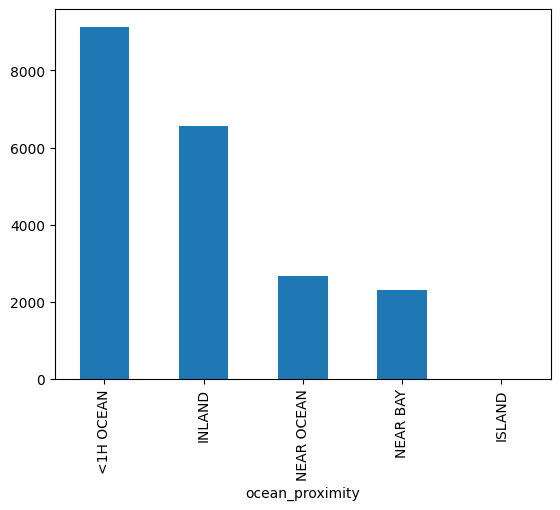

In [4]:
# how to show ocean_proximity in the plot
housing['ocean_proximity'].value_counts()
housing['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

In [5]:
# could you replace the ocean_proximity with numbers? using one hot encoding
housing = pd.get_dummies(housing, columns=['ocean_proximity']) # one hot encoding
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


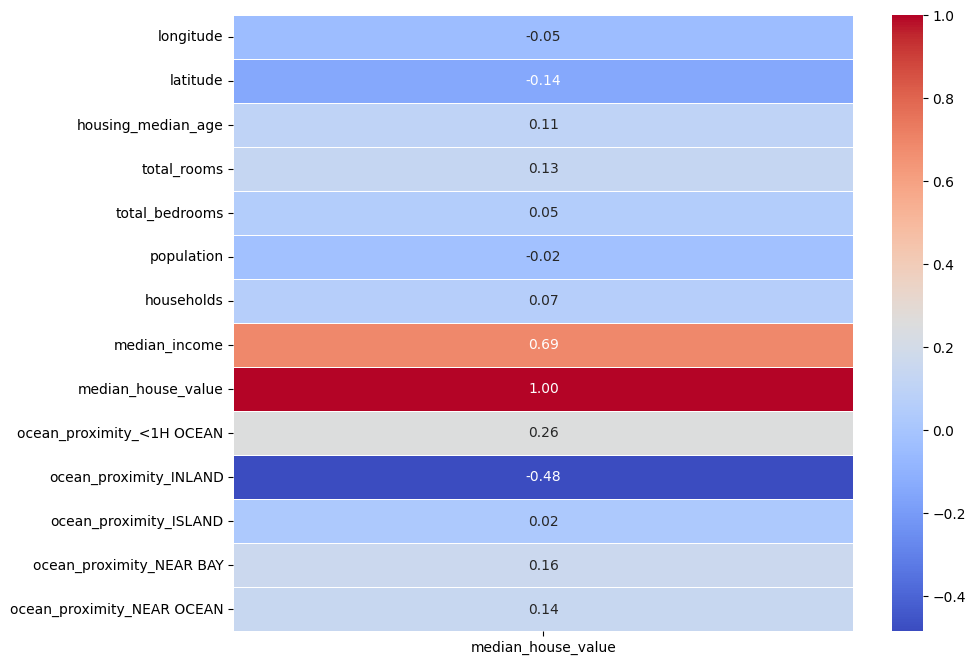

In [10]:

# graph correlation
import seaborn as sns

# Compute the correlation matrix for the target value 'median_house_value'
corr_matrix = housing.corr()['median_house_value'].to_frame()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()


In [20]:
# features selection base on correlation
print(corr_matrix[corr_matrix['median_house_value'] > 0.1])

features = corr_matrix[corr_matrix['median_house_value'] > 0.1].index.tolist()
# remove median_house_value from the list
features.remove('median_house_value')
print(features)



                            median_house_value
housing_median_age                    0.105623
total_rooms                           0.134153
median_income                         0.688075
median_house_value                    1.000000
ocean_proximity_<1H OCEAN             0.256617
ocean_proximity_NEAR BAY              0.160284
ocean_proximity_NEAR OCEAN            0.141862
['housing_median_age', 'total_rooms', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [36]:
x_values = housing[features]


# convert ocean_proximity_<1H OCEAN columns to float
x_values['ocean_proximity_<1H OCEAN'] = x_values['ocean_proximity_<1H OCEAN'].astype(float)
x_values['ocean_proximity_NEAR BAY'] = x_values['ocean_proximity_NEAR BAY'].astype(float)
x_values['ocean_proximity_NEAR OCEAN'] = x_values['ocean_proximity_NEAR OCEAN'].astype(float)

#show columns types
print(x_values.dtypes)

x_values.head(20)


housing_median_age            float64
total_rooms                   float64
median_income                 float64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object


/var/folders/n0/d8kx4bjx6nlb3w_y_c7670rh0000gn/T/ipykernel_29545/1953188938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values['ocean_proximity_<1H OCEAN'] = x_values['ocean_proximity_<1H OCEAN'].astype(float)
/var/folders/n0/d8kx4bjx6nlb3w_y_c7670rh0000gn/T/ipykernel_29545/1953188938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_values['ocean_proximity_NEAR BAY'] = x_values['ocean_proximity_NEAR BAY'].astype(float)
/var/folders/n0/d8kx4bjx6nlb3w_y_c7670rh0000gn/T/ipykernel_29545/195318893

,housing_median_age,total_rooms,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,8.3252,0.0,1.0,0.0
1,21.0,7099.0,8.3014,0.0,1.0,0.0
2,52.0,1467.0,7.2574,0.0,1.0,0.0
3,52.0,1274.0,5.6431,0.0,1.0,0.0
4,52.0,1627.0,3.8462,0.0,1.0,0.0
5,52.0,919.0,4.0368,0.0,1.0,0.0
6,52.0,2535.0,3.6591,0.0,1.0,0.0
7,52.0,3104.0,3.1200,0.0,1.0,0.0
8,42.0,2555.0,2.0804,0.0,1.0,0.0
9,52.0,3549.0,3.6912,0.0,1.0,0.0


In [40]:
import torch


print(x_values.shape)

# get ten examples of x_values on this format [[],[]]


x_values = torch.tensor(x_values, dtype=torch.float32)
x_values

(20640, 6)


ValueError: could not determine the shape of object type 'DataFrame'

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Sample data for multiple linear regression

x_values_original = x_values
y_values = housing['median_house_value']

# Convert the data to PyTorch tensors
X = torch.tensor(np.c_[np.ones(x_values.shape[0]), x_values], dtype=torch.float32)  # Add bias term
y = torch.tensor(y_values, dtype=torch.float32).reshape(-1, 1)

# Number of data points (m) and number of features (including bias)
m, n_features = X.shape

# Initialize weights randomly
weights = torch.randn((n_features, 1), requires_grad=False)


# Multiple linear regression model
def linear_regression(X, weights):
    return X.mm(weights) 

# Cost function (Mean Squared Error)
def cost_function(y_predicted, y_values):
    return (1/m) * torch.sum((y_predicted - y_values) ** 2)

# Hyperparameters
alpha = 0.01  # Learning rate
iterations = 2000  # Number of iterations

# Store the cost at each iteration for visualization
iteration_vs_cost = []

# Gradient descent
for i in range(iterations):
    # Forward pass: compute predicted y
    y_pred = linear_regression(X, weights)

    # Compute the cost (Mean Squared Error)
    cost = cost_function(y_pred, y)

    # Append cost for visualization
    iteration_vs_cost.append(cost.item())

    # Backward pass: compute gradients
    gradients = (1/m) * torch.mm(X.T, (y_pred - y))

    # Update the weights (Gradient Descent)
    weights = weights - alpha * gradients

    # Optionally, print the cost every 100 iterations for monitoring
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost.item()}, Weights = {weights.T}")

# Final weights (including intercept)
print(f"Final Weights (including intercept): {weights.T}")

# Plot the cost function with exponential y-axis
plt.plot(iteration_vs_cost)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')  
plt.show()

# Plot the data and the regression line (only works for 2D data)
print("x_values.shape")
print(x_values_original.shape)
print("x_values.shape[1]")
print(x_values_original.shape[1])

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.